<h1>Connect to Database<h1>

In [1]:
from sqlalchemy import create_engine
import pandas as pd

In [2]:
from dotenv import load_dotenv
import os

load_dotenv('pwd.env')

db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_host = os.getenv("DB_HOST")

In [5]:
username = db_user
password = db_password  
host = db_host
port = '5433'
database = 'House_Power_DWH'

connection_string = f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"
engine = create_engine(connection_string)

try:
    with engine.connect() as connection:
        print("connection was successful!")
except Exception as e:
    print("connectionfailed:",e)

connection was successful!


<h1> Business Question<h1>
<h5>1-What is the average global active power consumption per day?<h5>
<h5>2-What is the total energy consumed for each specified time period?</h5>
<h5>3-What is the average energy consumption per hour?</h5>
<h5>4-What is the maximum energy consumption recorded during a day?</h5>
<h5>5-What is the energy consumption during peak hours (between 6 PM and 9 PM)?</h5>



In [17]:
import pandas as pd
query = """
SELECT 
    "Date",
    AVG("Global_active_power KW") AS Avg_Global_Active_Power
FROM 
    "fact_energy_usage"
GROUP BY 
    "Date"
ORDER BY 
    "Date";
"""
avg_power_df = pd.read_sql(query, engine)
avg_power_df

,Date,avg_global_active_power
0,16/12/2006,3.053475
1,17/12/2006,2.354486
2,18/12/2006,1.530435
3,19/12/2006,1.157079
4,2007-01-02,1.267194
5,2007-02-02,1.158150
6,2007-03-02,2.798418
7,2008-07-01,1.177649
8,2008-08-01,1.419132
9,2008-09-01,1.241972


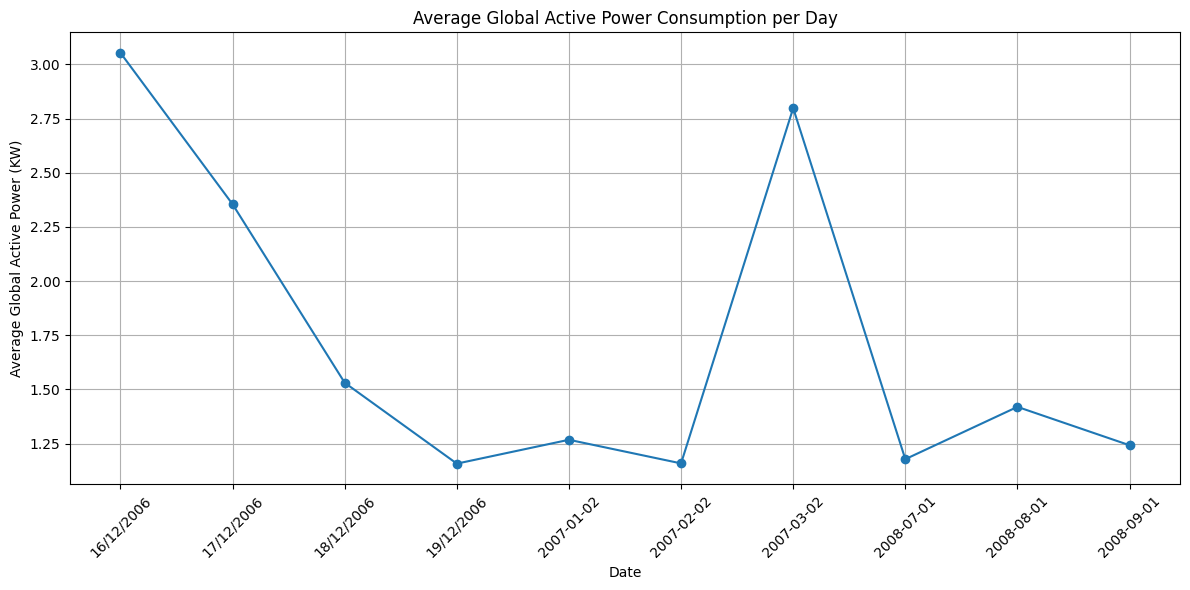

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(avg_power_df['Date'], avg_power_df['avg_global_active_power'], marker='o')
plt.title('Average Global Active Power Consumption per Day')
plt.xlabel('Date')
plt.ylabel('Average Global Active Power (KW)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


query = """
SELECT 
    "Date",
    "Time",
    SUM("Global_active_power KW") AS total_energy_consumed
FROM 
    public.fact_energy_usage
GROUP BY 
    "Date", "Time"
ORDER BY 
    "Date", "Time";
"""
total_energy_df = pd.read_sql(query, engine)
total_energy_df

,Date,Time,total_energy_consumed
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666
...,...,...,...
13351,2008-09-01,23:55:00,0.404
13352,2008-09-01,23:56:00,0.402
13353,2008-09-01,23:57:00,0.402
13354,2008-09-01,23:58:00,0.402


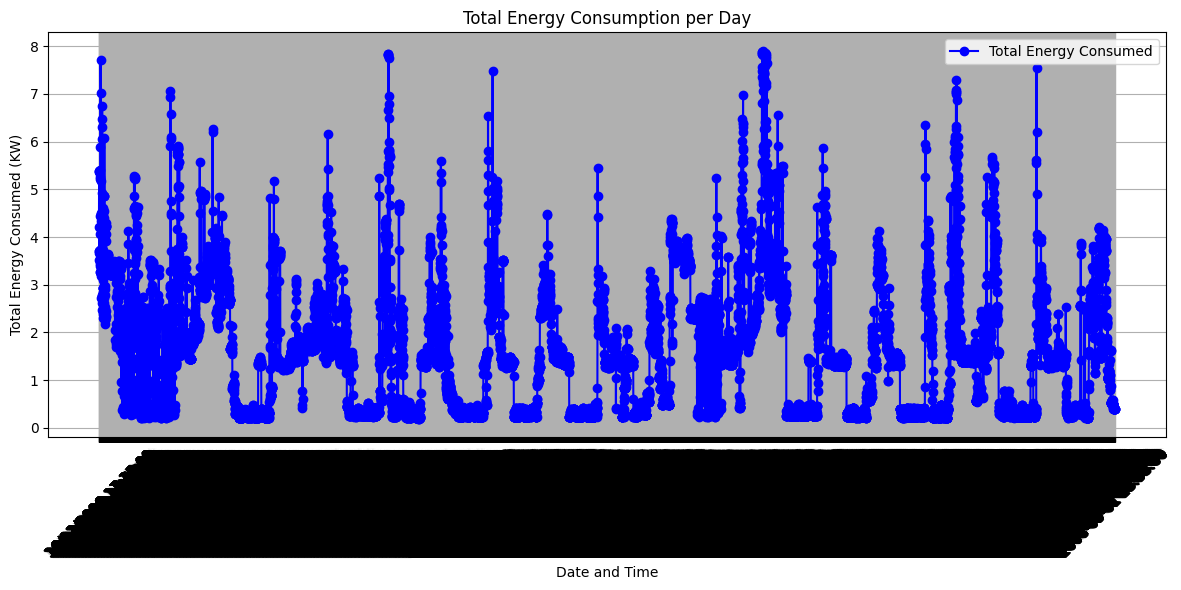

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(total_energy_df['Date'] + ' ' + total_energy_df['Time'], 
         total_energy_df['total_energy_consumed'],   
         marker='o', color='blue', label='Total Energy Consumed')

plt.title('Total Energy Consumption per Day')
plt.xlabel('Date and Time')
plt.ylabel('Total Energy Consumed (KW)')
plt.xticks(rotation=45)   
plt.grid()
plt.legend() 
plt.tight_layout()  
plt.show()   

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

query = """
SELECT 
    EXTRACT(HOUR FROM TO_TIMESTAMP("Time", 'HH24:MI:SS')) AS hour,
    AVG("Global_active_power KW") AS avg_energy_consumed
FROM 
    public.fact_energy_usage
GROUP BY 
    hour
ORDER BY 
    hour;
"""
avg_energy_df = pd.read_sql(query, engine)
avg_energy_df

,hour,avg_energy_consumed
0,0.0,1.100726
1,1.0,1.012093
2,2.0,0.797285
3,3.0,0.680833
4,4.0,0.817285
5,5.0,0.851393
6,6.0,1.377993
7,7.0,2.325248
8,8.0,2.251067
9,9.0,1.609007


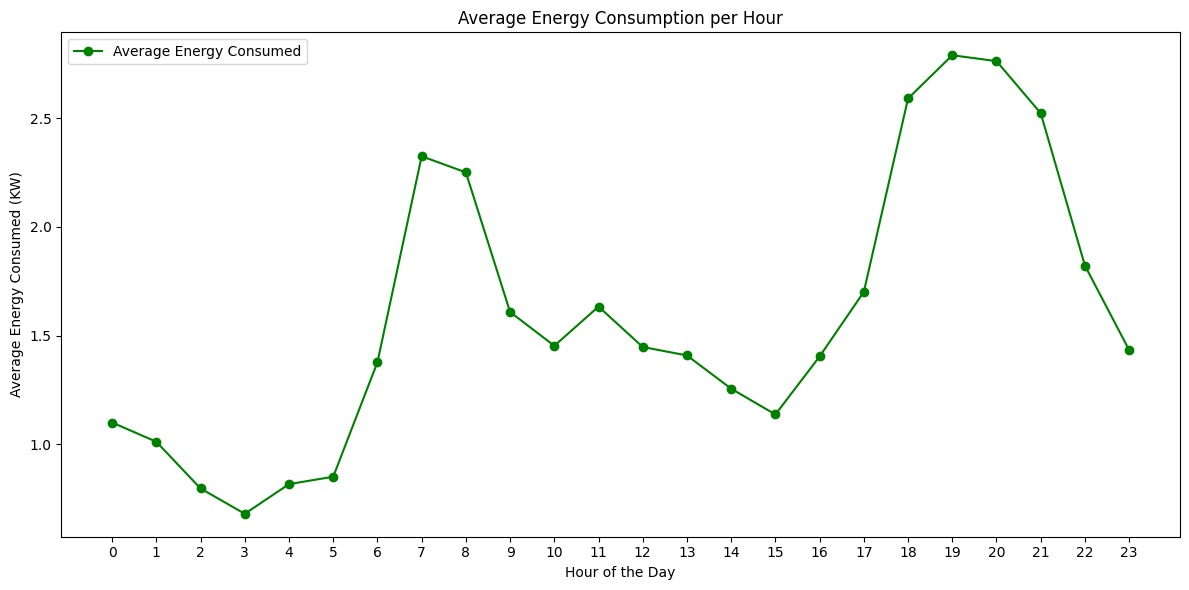

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(avg_energy_df['hour'], 
         avg_energy_df['avg_energy_consumed'], 
         marker='o', color='green', label='Average Energy Consumed')

plt.title('Average Energy Consumption per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Consumed (KW)')
plt.xticks(range(0, 24))  
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

query = """
SELECT 
    "Date",
    MAX("Global_active_power KW") AS max_energy_consumed
FROM 
    public.fact_energy_usage
GROUP BY 
    "Date"
ORDER BY 
    "Date";
"""

max_energy_df = pd.read_sql(query, engine)

max_energy_df


,Date,max_energy_consumed
0,16/12/2006,7.706
1,17/12/2006,7.064
2,18/12/2006,6.158
3,19/12/2006,7.840
4,2007-01-02,7.482
5,2007-02-02,5.448
6,2007-03-02,7.904
7,2008-07-01,5.864
8,2008-08-01,7.296
9,2008-09-01,7.540


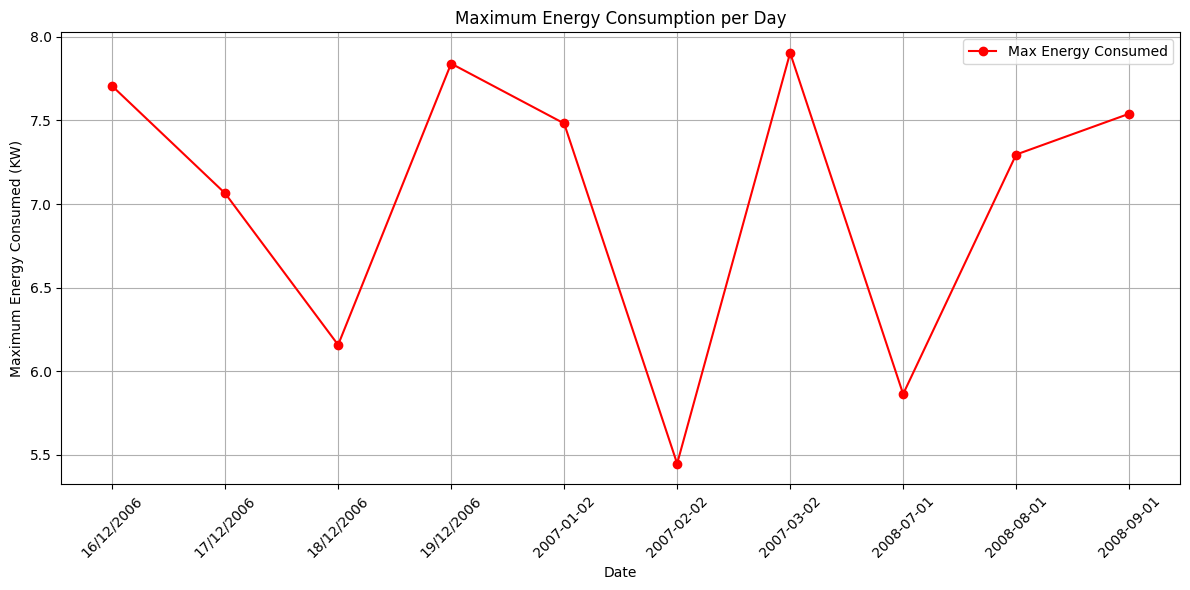

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(max_energy_df['Date'], 
         max_energy_df['max_energy_consumed'], 
         marker='o', color='red', label='Max Energy Consumed')

plt.title('Maximum Energy Consumption per Day')
plt.xlabel('Date')
plt.ylabel('Maximum Energy Consumed (KW)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
query = """
SELECT 
    "Date",
    SUM("Global_active_power KW") AS peak_energy_consumed
FROM 
    public.fact_energy_usage
WHERE 
    "Time" BETWEEN '18:00:00' AND '21:00:00'
GROUP BY 
    "Date"
ORDER BY 
    "Date";

"""

peak_energy_df = pd.read_sql(query, engine)
peak_energy_df


,Date,peak_energy_consumed
0,16/12/2006,621.374
1,17/12/2006,601.596
2,18/12/2006,487.330
3,19/12/2006,422.084
4,2007-01-02,462.576
5,2007-02-02,330.824
6,2007-03-02,862.468
7,2008-07-01,380.192
8,2008-08-01,321.448
9,2008-09-01,423.376


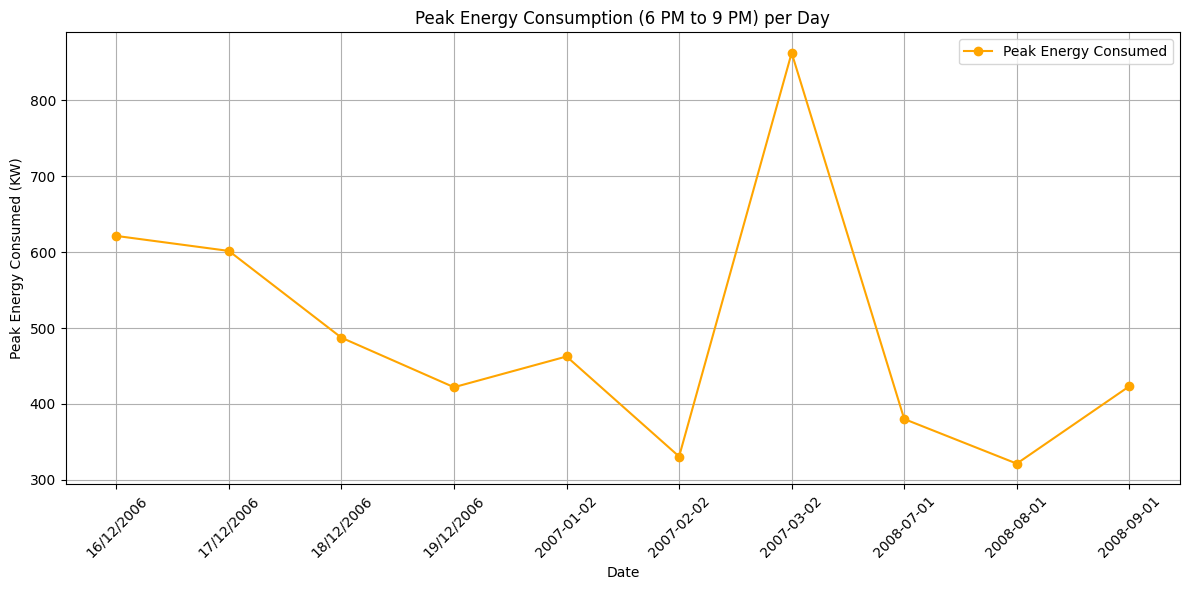

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(peak_energy_df['Date'], 
         peak_energy_df['peak_energy_consumed'], 
         marker='o', color='orange', label='Peak Energy Consumed')

plt.title('Peak Energy Consumption (6 PM to 9 PM) per Day')
plt.xlabel('Date')
plt.ylabel('Peak Energy Consumed (KW)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

